In [1]:
import sim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [26]:
n = 1000000
r = 1

ray = sim.utils.ray(np.array([1,0,0]),r*2,25)
analytics = sim.halos.Analytic.Uniform(ray,r=r)
rs = sim.utils.points2radius(ray)

means = []
maxs = []
variances = []
ns = []
downsamples = 2**np.arange(0,16)

for i in range(5):
    df = sim.halos.Sample.Uniform(n,r=r)
    temp_means = []
    temp_maxs = []
    temp_variances = []
    for downsample in tqdm(downsamples):
        downsampled_df = sim.halos.downsample(df,downsample)
        ns.append(len(downsampled_df.index))
        out,time = sim.static_solver.evaluate(ray,downsampled_df,precision="f8")
        diff = out-analytics
        temp_variances.append(np.var(diff))
        rdiff = np.abs(diff)/np.abs(analytics)
        temp_means.append(np.mean(rdiff))
        temp_maxs.append(np.max(rdiff))
    means.append(temp_means)
    maxs.append(temp_maxs)
    variances.append(temp_variances)

print(max(ns),"to",min(ns))

100%|██████████| 16/16 [00:01<00:00,  8.18it/s]

1000000 to 30


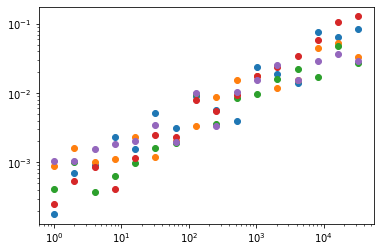

In [24]:
for mean in means:
    plt.scatter(downsamples,mean)
plt.xscale('log')
plt.yscale('log')
plt.show()

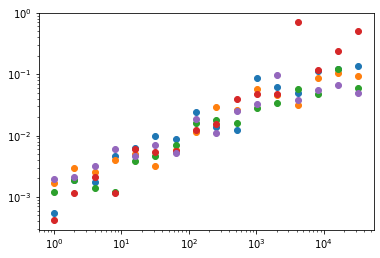

In [25]:
for this_max in maxs:
    plt.scatter(downsamples,this_max)
plt.xscale('log')
plt.yscale('log')
plt.show()

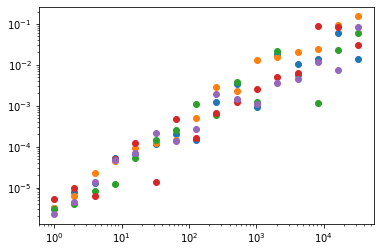

In [27]:
for variance in variances:
    plt.scatter(downsamples,variance)
plt.xscale('log')
plt.yscale('log')
plt.show()